# 图生图-ControlNet-Canny

同济子豪兄 2023-6-13

MMagic文档：https://github.com/open-mmlab/mmagic/tree/main/configs/controlnet

ControlNet官方Repo：https://github.com/lllyasviel/ControlNet

## 进入 MMagic 主目录

In [2]:
import os
os.chdir('mmagic')

## 导入工具包

In [3]:
import cv2
import numpy as np
import mmcv
from mmengine import Config
from PIL import Image

from mmagic.registry import MODELS
from mmagic.utils import register_all_modules

register_all_modules()

## 载入ControlNet模型

In [4]:
cfg = Config.fromfile('configs/controlnet/controlnet-canny.py')
controlnet = MODELS.build(cfg.model).cuda()

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


06/16 22:11:11 - mmengine - INFO - Set model dtype to 'torch.float32'.


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


06/16 22:11:35 - mmengine - INFO - Creating runwayml/stable-diffusion-v1-5 by 'HuggingFace'


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Do not support Xformers. Please install Xformers first. The program will run without Xformers.
06/16 22:11:44 - mmengine - INFO - Set model dtype to 'torch.float32'.
Do not support Xformers. Please install Xformers first. The program will run without Xformers.


## 输入Canny边缘图

In [5]:
print("hello")

hello


In [6]:
control_url = 'https://user-images.githubusercontent.com/28132635/230288866-99603172-04cb-47b3-8adb-d1aa532d1d2c.jpg'
control_img = mmcv.imread(control_url)
control = cv2.Canny(control_img, 100, 200)
control = control[:, :, None]
control = np.concatenate([control] * 3, axis=2)
control = Image.fromarray(control)

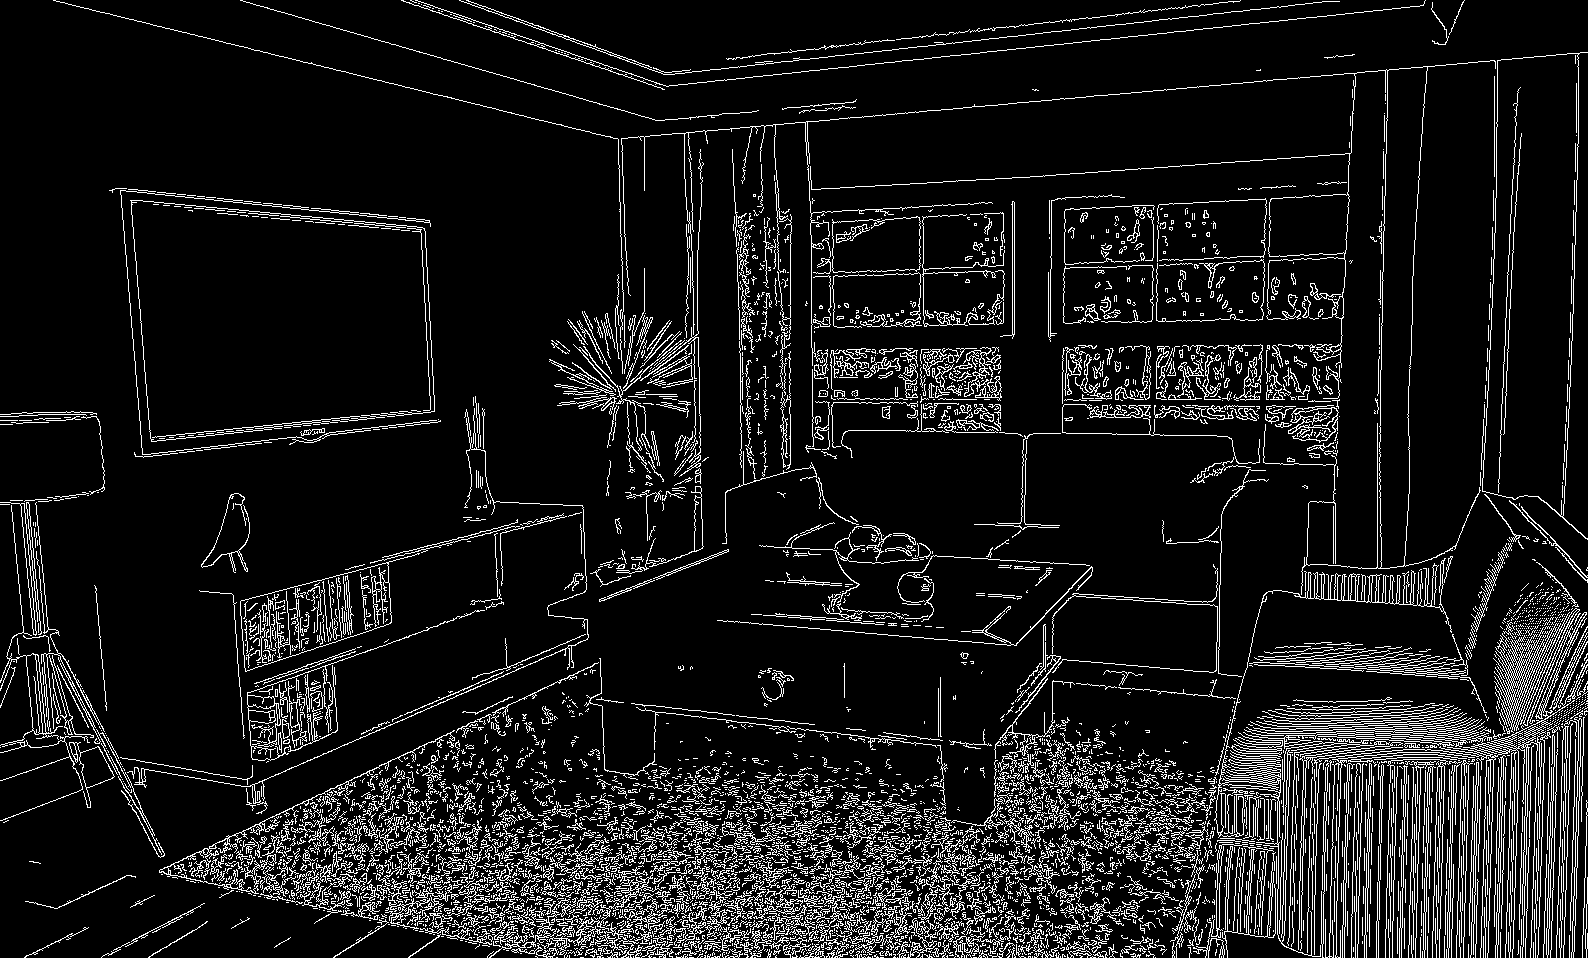

In [7]:
control

## 咒语Prompt

In [18]:
prompt = 'Room with blue walls and a yellow ceiling.'


## 执行预测

100%|██████████| 20/20 [00:04<00:00,  4.77it/s]


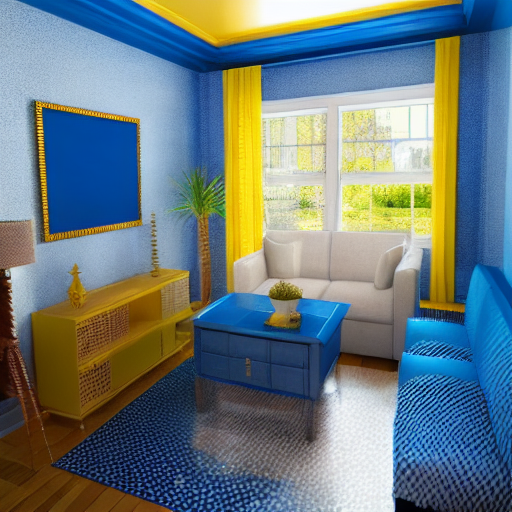

In [19]:
from PIL import Image
output_dict = controlnet.infer(prompt, control=control)
samples = output_dict['samples']
for idx, sample in enumerate(samples):
    sample.save(f'sample_{idx}.png')

controls = output_dict['controls']
for idx, control in enumerate(controls):
    control.save(f'control_{idx}.png')
Image.open(f'sample_{idx}.png')
# Image.open(f'control_{idx}.png')

In [ ]:
prompt = '房间蓝色的墙面，黄色的天花板'


100%|██████████| 20/20 [00:04<00:00,  4.75it/s]


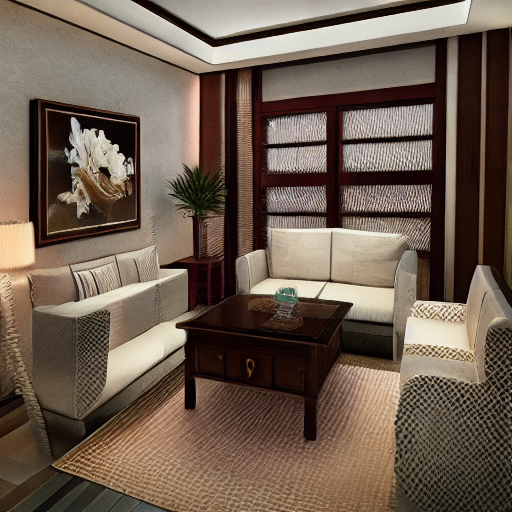

In [17]:
from PIL import Image
output_dict = controlnet.infer(prompt, control=control)
samples = output_dict['samples']
for idx, sample in enumerate(samples):
    sample.save(f'sample_{idx}.png')

controls = output_dict['controls']
for idx, control in enumerate(controls):
    control.save(f'control_{idx}.png')
Image.open(f'sample_{idx}.png')
# Image.open(f'control_{idx}.png')

In [20]:
prompt = '风格是现代风的房间，有沙发和电视，有吸顶灯，并且有一副现代背景画'

100%|██████████| 20/20 [00:04<00:00,  4.77it/s]


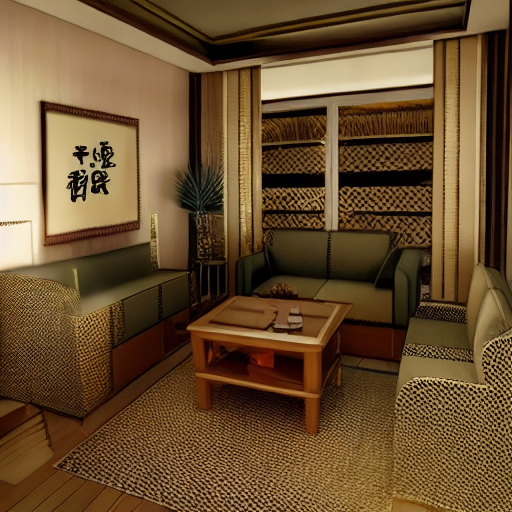

In [22]:
output_dict = controlnet.infer(prompt, control=control)
samples = output_dict['samples']
for idx, sample in enumerate(samples):
    sample.save(f'sample_{idx}.png')
controls = output_dict['controls']
for idx, control in enumerate(controls):
    control.save(f'control_{idx}.png')
Image.open(f'sample_{idx}.png')

100%|██████████| 20/20 [00:04<00:00,  4.76it/s]


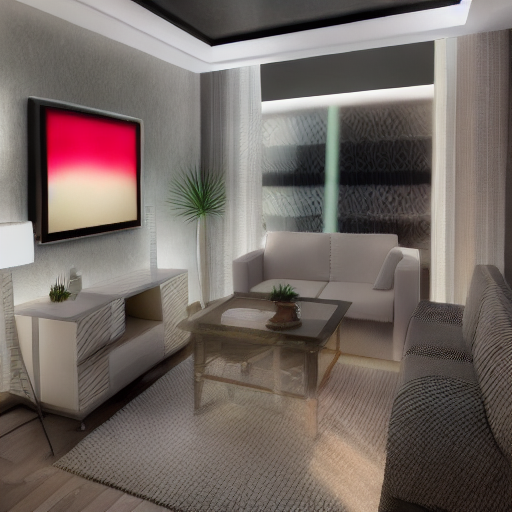

In [23]:
prompt = 'a modern room with a sofa and TV, a ceiling lamp, and a modern background painting'
output_dict = controlnet.infer(prompt, control=control)
samples = output_dict['samples']
for idx, sample in enumerate(samples):
    sample.save(f'sample_{idx}.png')
controls = output_dict['controls']
for idx, control in enumerate(controls):
    control.save(f'control_{idx}.png')
Image.open(f'sample_{idx}.png')